C:\Users\Francisco\AppData\Local\Temp\ipykernel_41096\687295004.py:58: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


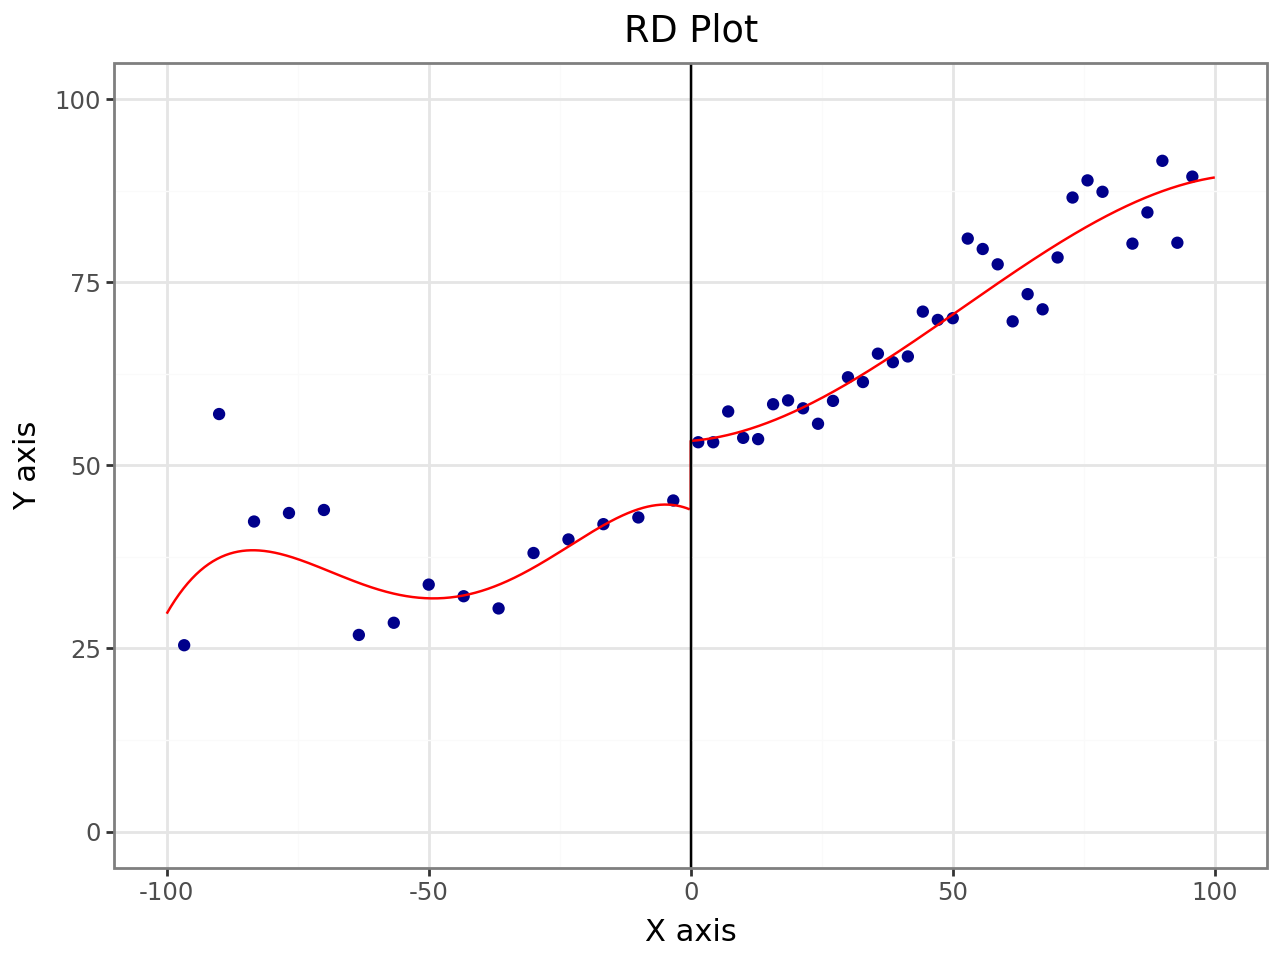

C:\Users\Francisco\AppData\Local\Temp\ipykernel_41096\687295004.py:62: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


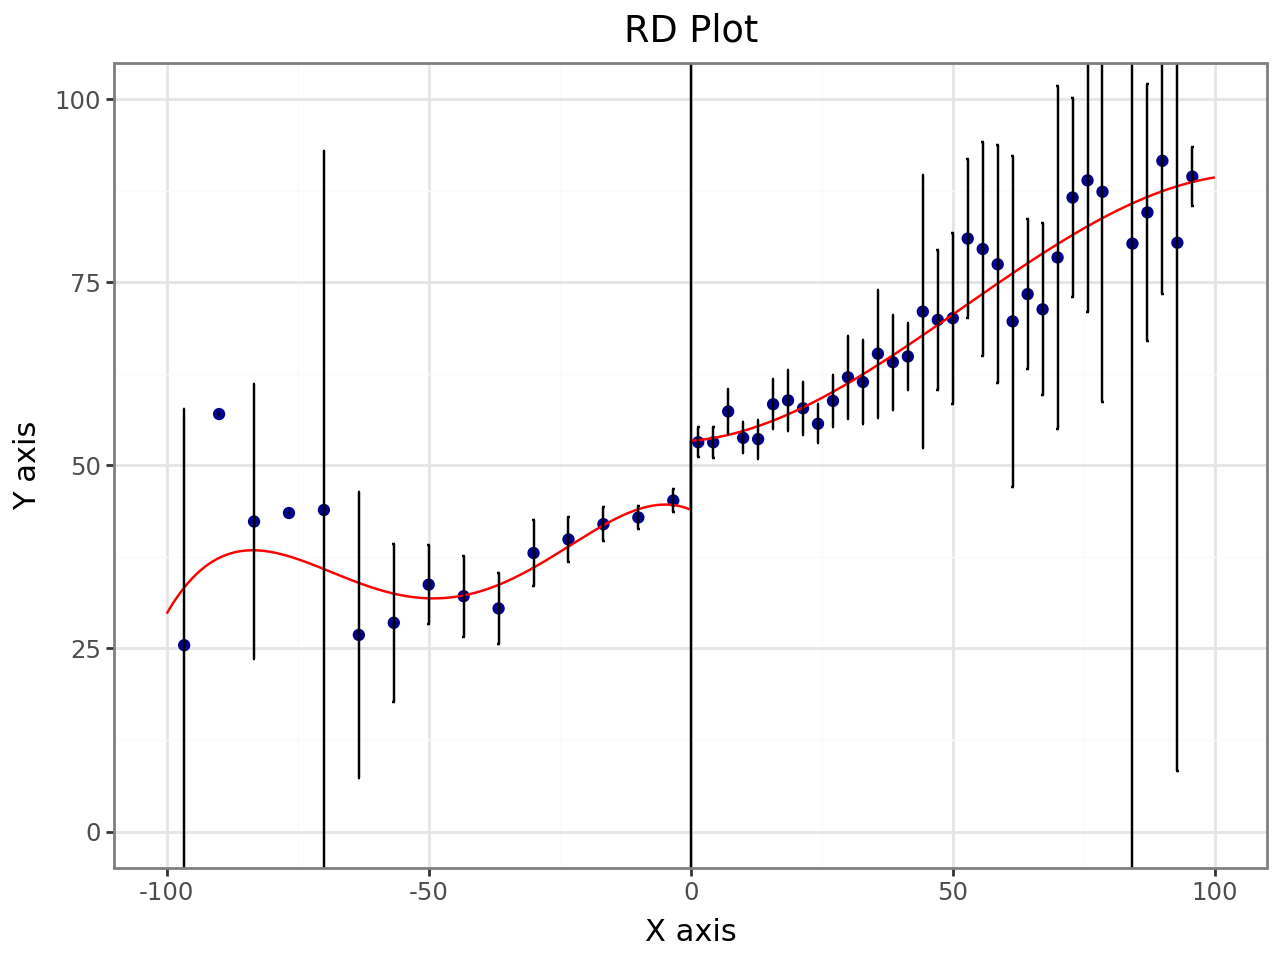

C:\Users\Francisco\AppData\Local\Temp\ipykernel_41096\687295004.py:66: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


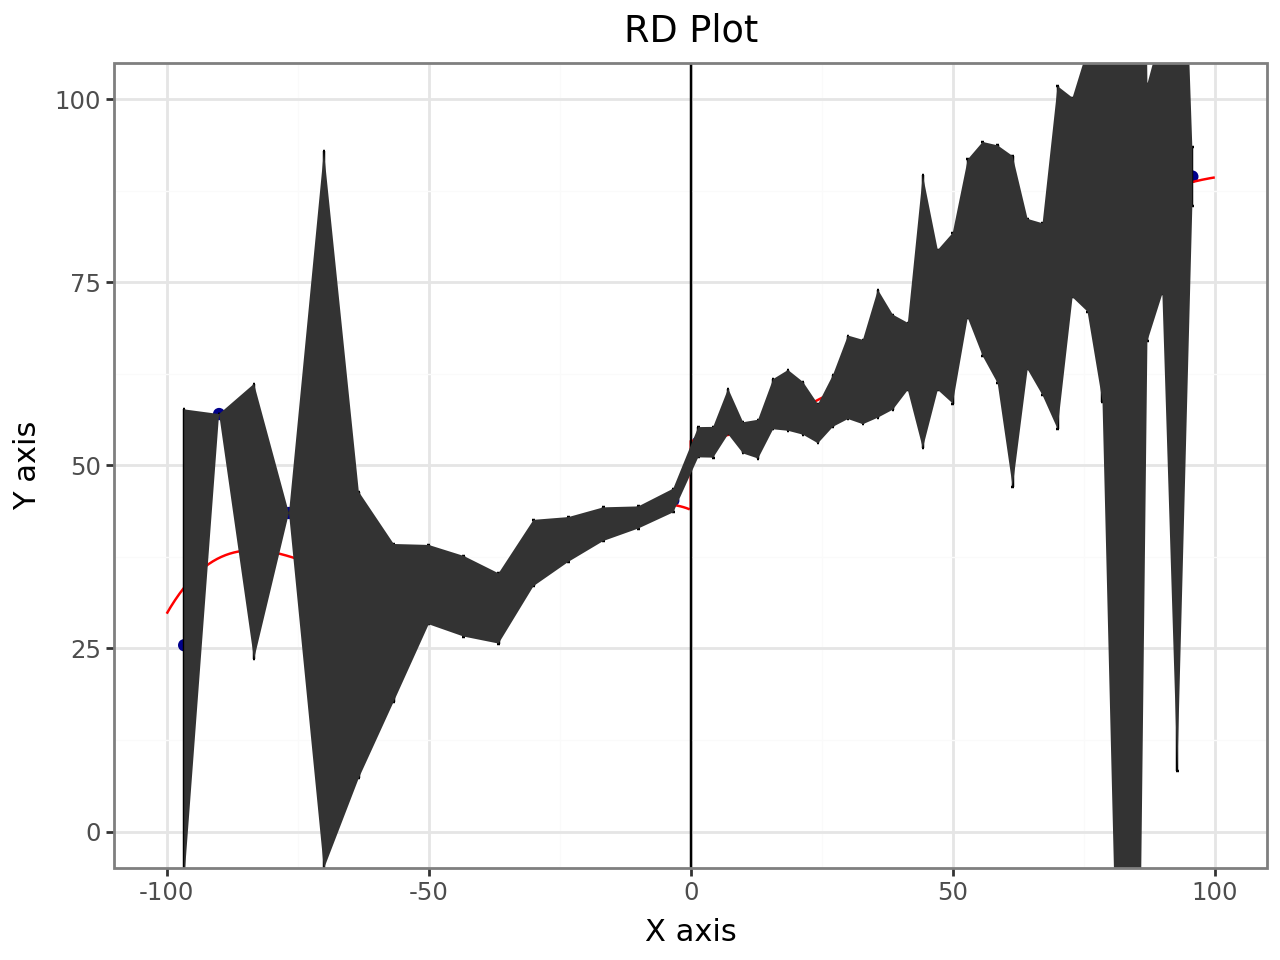

In [3]:
###########################################################################
## RDROBUST Python Package
## Python Script for Empirical Illustration
## Authors: Sebastian Calonico, Matias D. Cattaneo,
#           Max H. Farrell, Ricardo Masini and Rocio Titiunik 
###########################################################################

### Impot rdrobust package
from rdrobust import rdplot
import pandas as pd
from plotnine import *

### Load Data
df = pd.read_csv('rdrobust_senate.csv')
x = df.margin
y = df.vote
c = 0

###########################################################################
# Generate input data for output plot
###########################################################################
plot1 = rdplot(y,x, ci=95, hide=True)
rdplot_mean_bin = plot1.vars_bins["rdplot_mean_bin"]
rdplot_mean_y   = plot1.vars_bins["rdplot_mean_y"]
y_hat           = plot1.vars_poly["rdplot_y"]
x_plot          = plot1.vars_poly["rdplot_x"]
rdplot_cil_bin  = plot1.vars_bins["rdplot_ci_l"]
rdplot_cir_bin  = plot1.vars_bins["rdplot_ci_r"]
rdplot_mean_bin = plot1.vars_bins["rdplot_mean_bin"]
y_hat_r = y_hat[x_plot>=c]
y_hat_l = y_hat[x_plot<c]
x_plot_r = x_plot[x_plot>=c]
x_plot_l = x_plot[x_plot<c]


col_lines = "red"
col_dots  = "darkblue"
type_dots = 20
title = "RD Plot"
x_label = "X axis"
y_label = "Y axis"
x_lim = (min(x),max(x))
y_lim = (min(y), max(y))

###########################################################################
# Generate rdplot using ggplot2
###########################################################################
temp_plot = (ggplot() + theme_bw() +

                    geom_point(aes(x=rdplot_mean_bin, y=rdplot_mean_y), color=col_dots, na_rm=True) +
                    geom_line(aes(x=x_plot_l, y=y_hat_l), color=col_lines, na_rm=True) +
                    geom_line(aes(x=x_plot_r, y=y_hat_r), color=col_lines, na_rm=True) +
                    labs(x = x_label, y = y_label) + ggtitle(title) +
                    labs(title = title, y = y_label, x = x_label) +
                    coord_cartesian(xlim = x_lim, ylim = y_lim) +
                    theme(legend_position = "None") +
                    geom_vline(xintercept = c, size = 0.5))
print(temp_plot)

## Add confidence intervals 
temp_plot = temp_plot + geom_errorbar(aes(x = rdplot_mean_bin, ymin = rdplot_cil_bin, ymax = rdplot_cir_bin)) 
print(temp_plot)

# Shade
temp_plot = temp_plot + geom_ribbon(aes(x = rdplot_mean_bin, ymin = rdplot_cil_bin, ymax = rdplot_cir_bin))
print(temp_plot)